# Import software libraries

In [1]:
import sys                             # Read system parameters
import os                              # Interact with the operating system
import numpy as np                     # Work with multi-dimensional arrays and matrices
import pandas as pd                    # Manipulate and analyze data
import matplotlib                      # Create 2D charts
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp                     # Perform scientific computing and advanced mathematics
import sklearn                         # Perform data mining and analysis
import seaborn as sb                   # Perform data visualization

# Summarize software libraries used
print('Libraries used in this project:')
print('- NumPy {}'.format(np.__version__))
print('- Pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- SciPy {}'.format(sp.__version__))
print('- Scikit-learn {}'.format(sklearn.__version__))
print('- Python {}\n'.format(sys.version))

Libraries used in this project:
- NumPy 2.1.1
- Pandas 2.2.2
- Matplotlib 3.9.2
- SciPy 1.14.1
- Scikit-learn 1.5.1
- Python 3.12.4 | packaged by Anaconda, Inc. | (main, Jun 18 2024, 15:03:56) [MSC v.1929 64 bit (AMD64)]



# Load the dataset

In [2]:
df = pd.read_csv('./seoul_bike_data/seoul_bike_data.csv')

# Get acquainted with the dataset

In [3]:
print("Dataset info:\n")
print(df.info())
print("\nChecking for missing values:\n")
print(df.isnull().sum())

Dataset info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8394 entries, 0 to 8393
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bikes_rented  8394 non-null   int64  
 1   temp          8394 non-null   float64
 2   humidity      8394 non-null   int64  
 3   wind_speed    8394 non-null   float64
 4   visibility    8394 non-null   int64  
 5   dew_temp      8394 non-null   float64
 6   solar_rad     8394 non-null   float64
 7   rainfall      8394 non-null   float64
 8   snowfall      8394 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 590.3 KB
None

Checking for missing values:

bikes_rented    0
temp            0
humidity        0
wind_speed      0
visibility      0
dew_temp        0
solar_rad       0
rainfall        0
snowfall        0
dtype: int64


# Show example records

In [4]:
print("\nFirst 10 records:\n")
print(df.head(10))


First 10 records:

   bikes_rented  temp  humidity  wind_speed  visibility  dew_temp  solar_rad  \
0           254  -5.2        37         2.2        2000     -17.6       0.00   
1           204  -5.5        38         0.8        2000     -17.6       0.00   
2           173  -6.0        39         1.0        2000     -17.7       0.00   
3           107  -6.2        40         0.9        2000     -17.6       0.00   
4            78  -6.0        36         2.3        2000     -18.6       0.00   
5           100  -6.4        37         1.5        2000     -18.7       0.00   
6           181  -6.6        35         1.3        2000     -19.5       0.00   
7           460  -7.4        38         0.9        2000     -19.3       0.00   
8           930  -7.6        37         1.1        2000     -19.8       0.01   
9           490  -6.5        27         0.5        1928     -22.4       0.23   

   rainfall  snowfall  
0       0.0       0.0  
1       0.0       0.0  
2       0.0       0.0  
3  

# Examine a general summary of statistics

In [5]:
print("\nSummary statistics:\n")
print(df.describe())


Summary statistics:

       bikes_rented         temp     humidity   wind_speed   visibility  \
count   8394.000000  8394.000000  8394.000000  8394.000000  8394.000000   
mean     731.374792    12.812009    58.074696     1.740481  1433.226590   
std      643.616638    12.108977    20.483539     1.026341   609.803729   
min        2.000000   -17.800000     0.000000     0.100000    27.000000   
25%      214.000000     3.100000    42.000000     1.000000   932.250000   
50%      546.000000    13.600000    57.000000     1.500000  1690.000000   
75%     1088.000000    22.700000    74.000000     2.300000  2000.000000   
max     3556.000000    39.400000    98.000000     7.400000  2000.000000   

          dew_temp    solar_rad     rainfall     snowfall  
count  8394.000000  8394.000000  8394.000000  8394.000000  
mean      3.964260     0.572427     0.149261     0.077949  
std      13.242399     0.870429     1.126075     0.445800  
min     -30.600000     0.000000     0.000000     0.000000  
25

# Look for columns that correlate with `bikes_rented`

In [6]:
print("\nCorrelation with bikes_rented:\n")
print(df.corr()['bikes_rented'])


Correlation with bikes_rented:

bikes_rented    1.000000
temp            0.563440
humidity       -0.201466
wind_speed      0.120961
visibility      0.213989
dew_temp        0.401160
solar_rad       0.272748
rainfall       -0.128794
snowfall       -0.151881
Name: bikes_rented, dtype: float64


# Visually analyze cross correlations

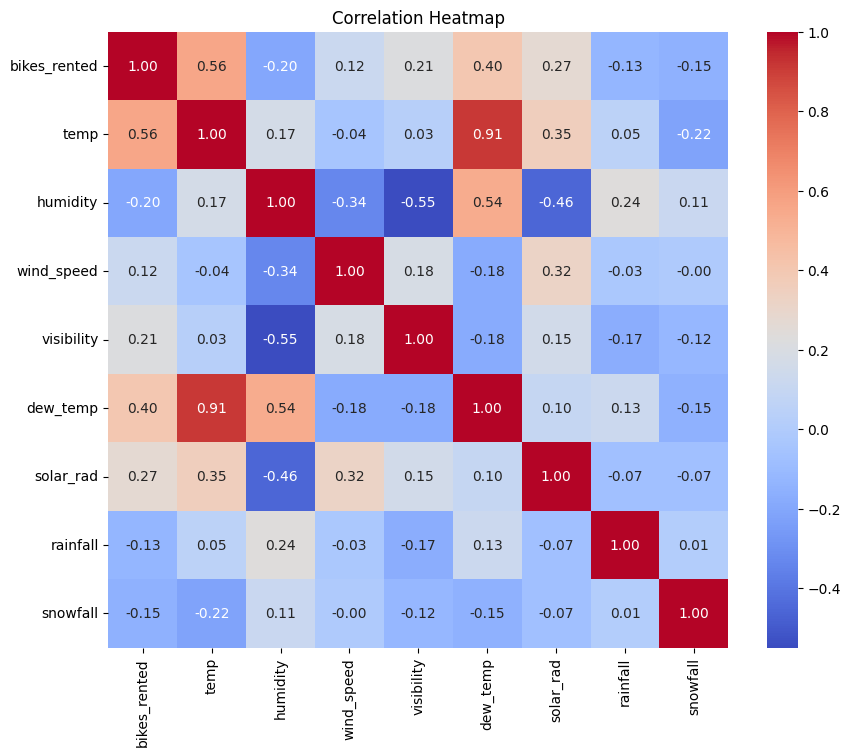

In [7]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Use histograms to visualize the distribution of all features

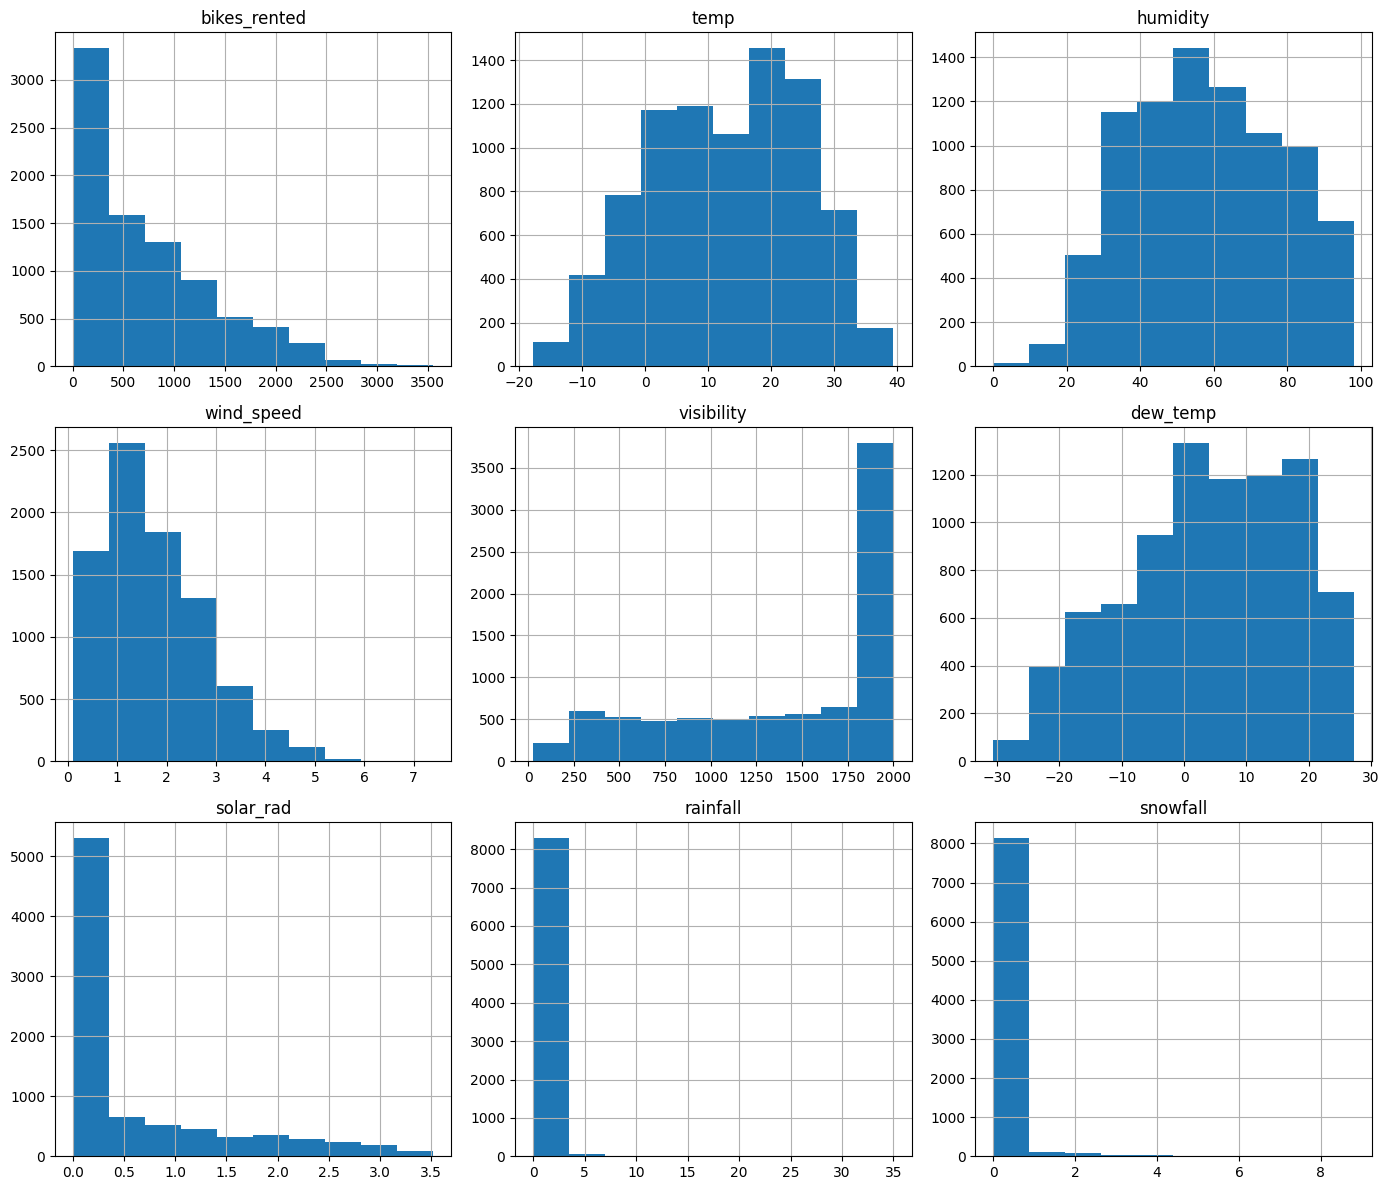

In [8]:
df.hist(figsize=(14,12))
plt.tight_layout()
plt.show()


# Split the data into training and testing sets and labels

In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(['bikes_rented'], axis=1)
y = df['bikes_rented']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Original dataset shape: {df.shape}")
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Original dataset shape: (8394, 9)
Training set shape: (6715, 8)
Test set shape: (1679, 8)


# Build and test an initial linear regression model

In [10]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

# Use the holdout dataset to test the model

In [11]:
print(f"Initial model R^2 score: {model.score(X_test, y_test)}")

Initial model R^2 score: 0.4435625734237316


# Compare the first ten predictions to actual values

In [12]:
y_pred = model.predict(X_test)
comparison = pd.DataFrame({'Actual': y_test[:10], 'Predicted': y_pred[:10]})
print("\nFirst ten predictions:\n", comparison)


First ten predictions:
       Actual    Predicted
33       328    82.528285
3898    1058  1156.071911
766      273   517.007936
8071    1037   813.263484
4746    2378  1079.153589
5422     695   844.249676
1426     170   123.496310
1328     322   -59.803804
1076     321   444.626422
5209     670   843.559925


# Identify outliers

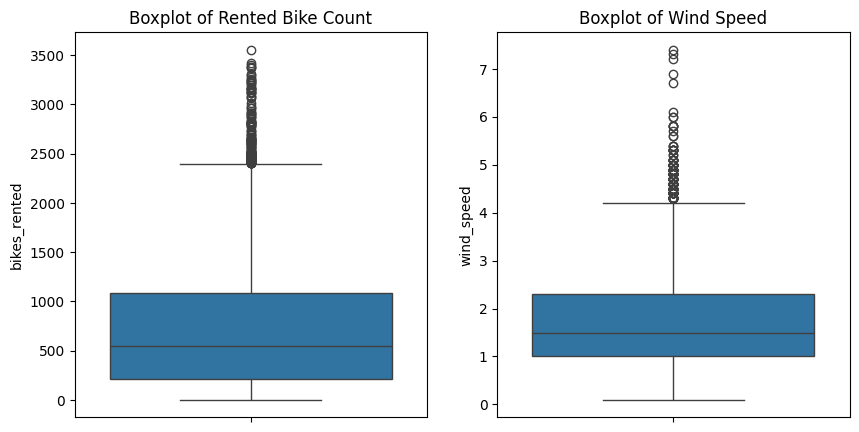

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1, 2, 1)
sb.boxplot(y=df['bikes_rented'])
plt.title('Boxplot of Rented Bike Count')

plt.subplot(1, 2, 2)
sb.boxplot(y=df['wind_speed'])
plt.title('Boxplot of Wind Speed')
plt.show()

# Examine data values in the outliers

In [14]:
print("\nOutliers with more than 3,500 bikes rented:\n", df[df['bikes_rented'] > 3500])


Outliers with more than 3,500 bikes rented:
       bikes_rented  temp  humidity  wind_speed  visibility  dew_temp  \
4743          3556  24.1        57         2.9        1301      15.0   

      solar_rad  rainfall  snowfall  
4743       0.56       0.0       0.0  


In [15]:
print("\nOutliers with wind speed greater than 6 m/s:\n", df[df['wind_speed'] > 6])


Outliers with wind speed greater than 6 m/s:
       bikes_rented  temp  humidity  wind_speed  visibility  dew_temp  \
909            146   0.7        77         6.7         692      -2.8   
3108           913  21.2        35         7.4        1992       5.1   
3112          1805  19.7        52         7.2        2000       9.5   
3114           336  19.1        58         6.1        2000      10.6   
3115           133  17.5        70         7.3        1634      11.9   
6230            49  25.3        70         6.9         925      19.4   

      solar_rad  rainfall  snowfall  
909         0.0       0.9       1.0  
3108        1.8       0.0       0.0  
3112        0.2       0.0       0.0  
3114        0.0       0.0       0.0  
3115        0.0       0.5       0.0  
6230        0.0       0.4       0.0  


# Drop outliers from the training dataset

In [16]:
df_cleaned = df[(df['bikes_rented'] < 3500) & (df['wind_speed'] < 6)]
X_cleaned = df_cleaned.drop('bikes_rented', axis=1)
y_cleaned = df_cleaned['bikes_rented']

X_train_cleaned, X_test_cleaned, y_train_cleaned, y_test_cleaned = train_test_split(X_cleaned, y_cleaned, test_size=0.2, random_state=42)

# Compare the scale and distribution of `bikes_rented` and `wind_speed`

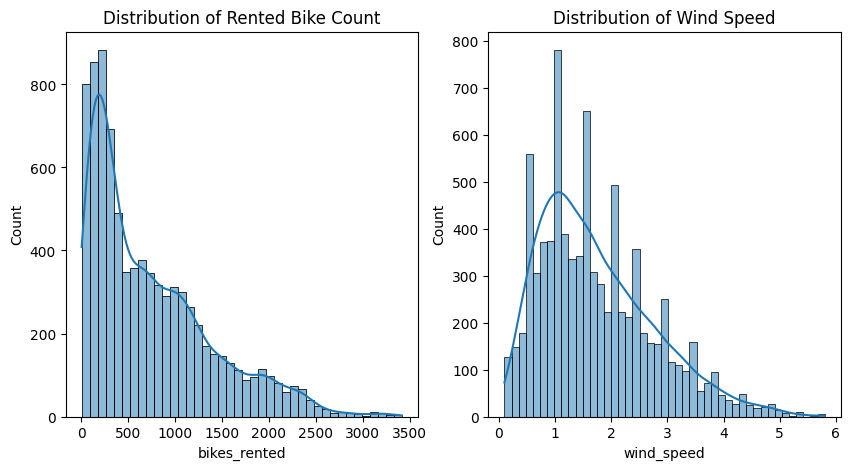

In [17]:
import seaborn as sb
def compare_distributions(feature1, feature2, title1, title2):
    plt.figure(figsize=(10,5))
    plt.subplot(1, 2, 1)
    sb.histplot(feature1, kde=True)
    plt.title(title1)
    
    plt.subplot(1, 2, 2)
    sb.histplot(feature2, kde=True)
    plt.title(title2)
    plt.show()

compare_distributions(df_cleaned['bikes_rented'], df_cleaned['wind_speed'], 'Distribution of Rented Bike Count', 'Distribution of Wind Speed')

# Transform `bikes_rented` and `wind_speed`, and compare results

C:\Users\zonda\AppData\Local\Temp\ipykernel_22576\2704609060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Log Rented Bike Count'] = np.log(df_cleaned['bikes_rented'])
C:\Users\zonda\AppData\Local\Temp\ipykernel_22576\2704609060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Log Wind Speed'] = np.log(df_cleaned['wind_speed'])


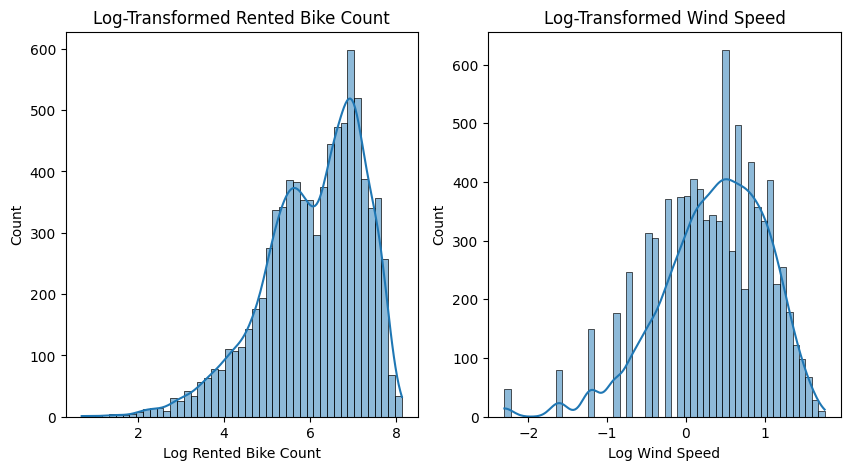

In [18]:
import seaborn as sb 
df_cleaned['Log Rented Bike Count'] = np.log(df_cleaned['bikes_rented'])
df_cleaned['Log Wind Speed'] = np.log(df_cleaned['wind_speed'])

compare_distributions(df_cleaned['Log Rented Bike Count'], df_cleaned['Log Wind Speed'], 'Log-Transformed Rented Bike Count', 'Log-Transformed Wind Speed')

# Build and test a new linear regression model

In [19]:
model_cleaned = LinearRegression()
model_cleaned.fit(X_train_cleaned, y_train_cleaned)
print(f"Cleaned model R^2 score: {model_cleaned.score(X_test_cleaned, y_test_cleaned)}")

Cleaned model R^2 score: 0.4076959090174026


# Compare the first ten predictions to actual values for the new model

In [20]:
y_pred_cleaned = model_cleaned.predict(X_test_cleaned)
comparison_cleaned = pd.DataFrame({'Actual': y_test_cleaned[:10], 'Predicted': y_pred_cleaned[:10]})
print("\nFirst ten predictions (cleaned data):\n", comparison_cleaned)


First ten predictions (cleaned data):
       Actual    Predicted
2868    1381  1140.444664
8186    1671   484.380920
5941     466  1133.653968
4865    2387  1399.708174
6869     988   856.478507
2033     306   816.994815
1057     122   353.021772
2861     264   438.653805
6293     582  1465.605580
4045    1612  1135.763183


# Convert the bike rentals back to their initial scale

In [21]:
comparison_cleaned['Actual (Original Scale)'] = np.exp(comparison_cleaned['Actual'])
comparison_cleaned['Predicted (Original Scale)'] = np.exp(comparison_cleaned['Predicted'])
print("\nFirst ten predictions (original scale):\n", comparison_cleaned)


First ten predictions (original scale):
       Actual    Predicted  Actual (Original Scale)  Predicted (Original Scale)
2868    1381  1140.444664                      inf                         inf
8186    1671   484.380920                      inf               2.311855e+210
5941     466  1133.653968            2.405629e+202                         inf
4865    2387  1399.708174                      inf                         inf
6869     988   856.478507                      inf                         inf
2033     306   816.994815            7.836307e+132                         inf
1057     122   353.021772             9.636666e+52               2.067319e+153
2861     264   438.653805            4.505502e+114               3.198356e+190
6293     582  1465.605580            5.746302e+252                         inf
4045    1612  1135.763183                      inf                         inf


c:\ProgramData\anaconda3\envs\workflowkrnl\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\ProgramData\anaconda3\envs\workflowkrnl\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)
